In [37]:
from lr_utils import load_dataset
import copy
import numpy as np
import matplotlib.pyplot as plt

In [38]:

def initialize_zeros__(x, dim):
    return np.zeros((x.shape[0], dim))

In [39]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [40]:
train_set_x_orig.shape[0]

209

In [41]:
def sigmoid__(z):
    s = 1/(1+ np.exp(-z))
    return s

In [42]:
# propogate function

def propogate__(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid__(np.dot(w.T, X) + b)
    cost = -(1/m)*np.sum((-Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    grad = {'dw': dw,
            'db': db
           }

    return grad, cost

In [73]:
def optimizer__(w, b ,X , Y, learning_rate, iterations):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    X = copy.deepcopy(X)
    Y = copy.deepcopy(Y)
    
    
    for i in range(iterations):
        grad, cost = propogate__(w=w, b=b, X=X, Y=Y)
        
        dw = grad['dw']
        
        db = grad['db']       
        w = w - (learning_rate)*dw

        b = b - (learning_rate)*db
        
    params = {
        'w': w,
        'b': b
    }
    
    grads = {
        'dw': dw,
        'db': db
    }
    
    cost = np.squeeze(cost)
    return params, cost, grads
    

In [74]:
def predict__(x, w, b):
    
    y = sigmoid__(np.dot(w.T, x) + b)
    
    return y

In [75]:
num_px = 64
# m = len(train_set_x_orig)

In [136]:
a= np.random.randn(1,3) # a.shape = (1, 3)a.shape=(1,3)

b = np.random.randn(3, 3) # b.shape = (3, 3)b.shape=(3,3)

c = a * b
c.shape


(3, 3)

In [76]:
# x1 = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

In [77]:
# x1.shape

In [78]:
# x1[0].shape

In [79]:
# x1 = x1/ 255.


In [80]:
# Mistake: Consider X as a matrix not a single example for the model

In [81]:
# train_set_y_orig[0]

In [96]:
def train_lr(train_data_x, train_data_y):
    
    train_data_x = train_data_x.reshape(train_data_x.shape[0], -1).T
    train_data_x = train_data_x/ 255.
    w = initialize_zeros__(train_data_x, 1)
    b = 0.0

    params, cost, grads = optimizer__(w=w, b=b, X=train_data_x, Y=train_data_y, learning_rate=0.003, iterations=2000)

    w = params['w']
    b = params['b']

    return w, b


In [97]:
weights, biases = train_lr(train_set_x_orig, train_set_y_orig)

In [130]:
weights, biases

(array([[ 0.00773216],
        [-0.0202247 ],
        [-0.00941977],
        ...,
        [-0.00935168],
        [-0.02396778],
        [ 0.0175256 ]]),
 -0.017480313732343912)

In [138]:
weights.shape, biases

((12288, 1), -0.017480313732343912)

In [100]:
weights.shape

(12288, 1)

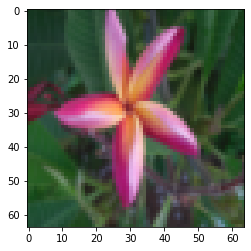

In [126]:


image_to_predict = test_set_x_orig[16]
plt.imshow(image_to_predict)
image_to_predict = image_to_predict / 255.
image_to_predict = image_to_predict.reshape((1, num_px * num_px * 3)).T


In [127]:
A = predict__(x= image_to_predict, w=weights, b=biases)

In [128]:
A.shape

(1, 1)

In [129]:
A

array([[0.03882176]])